In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import itertools
sns.set()

In [13]:
import pandas as pd
data_raw=pd.read_csv("Elon_musk.csv",error_bad_lines=False,sep=";", encoding='mac_roman')
data_raw.head()

b'Skipping line 29: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 69: expected 1 fields, saw 2\nSkipping line 98: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 120: expected 1 fields, saw 2\nSkipping line 137: expected 1 fields, saw 2\nSkipping line 141: expected 1 fields, saw 2\nSkipping line 149: expected 1 fields, saw 2\nSkipping line 154: expected 1 fields, saw 3\nSkipping line 155: expected 1 fields, saw 2\nSkipping line 163: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 188: expected 1 fields, saw 2\nSkipping line 189: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping line 221: expected 1 fields, saw 2\nSkipping line 231: expected 1 fields, saw 2\nSkipping line 233: expected 1 fields, saw 2\nSkipping line 236: expected 1 fields, saw 2\nSkipping line 

,",Text"
0,"1,@kunalb11 Iím an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."


In [15]:
data = [i.strip() for i in data_raw[',Text']]
data = [i for i in data if i]
data[0:5]

['1,@kunalb11 Iím an alien',
 '2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '3,@joerogan @Spotify Great interview!',
 '4,@gtera27 Doge is underestimated',
 '5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [16]:
nlp = spacy.load('en_core_web_sm')

doc_block = nlp(''.join(data))
spacy.displacy.render(doc_block[0:5], style = 'ent', jupyter = True)

In [17]:
for token in doc_block[0:5]:
    print(token, token.pos_)

1,@kunalb11 X
Iím VERB
an DET
alien2,@ID_AA_Carmack PROPN
Ray PROPN


In [18]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs[0:5]

['Iím', 'tracing', 'level', 'tried', 'interview!4,@gtera27']

In [19]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
wf_df = pd.DataFrame(word_freq, columns = ['Word', 'Count'])
wf_df = wf_df.sort_values(by ='Count', ascending = False)
wf_df = wf_df.reset_index(drop = True)
wf_df

,Word,Count
0,spacex,148
1,co,145
2,https,143
3,will,139
4,launch,42
...,...,...
2846,kids,1
2847,709,1
2848,dragonö,1
2849,rehearsal,1


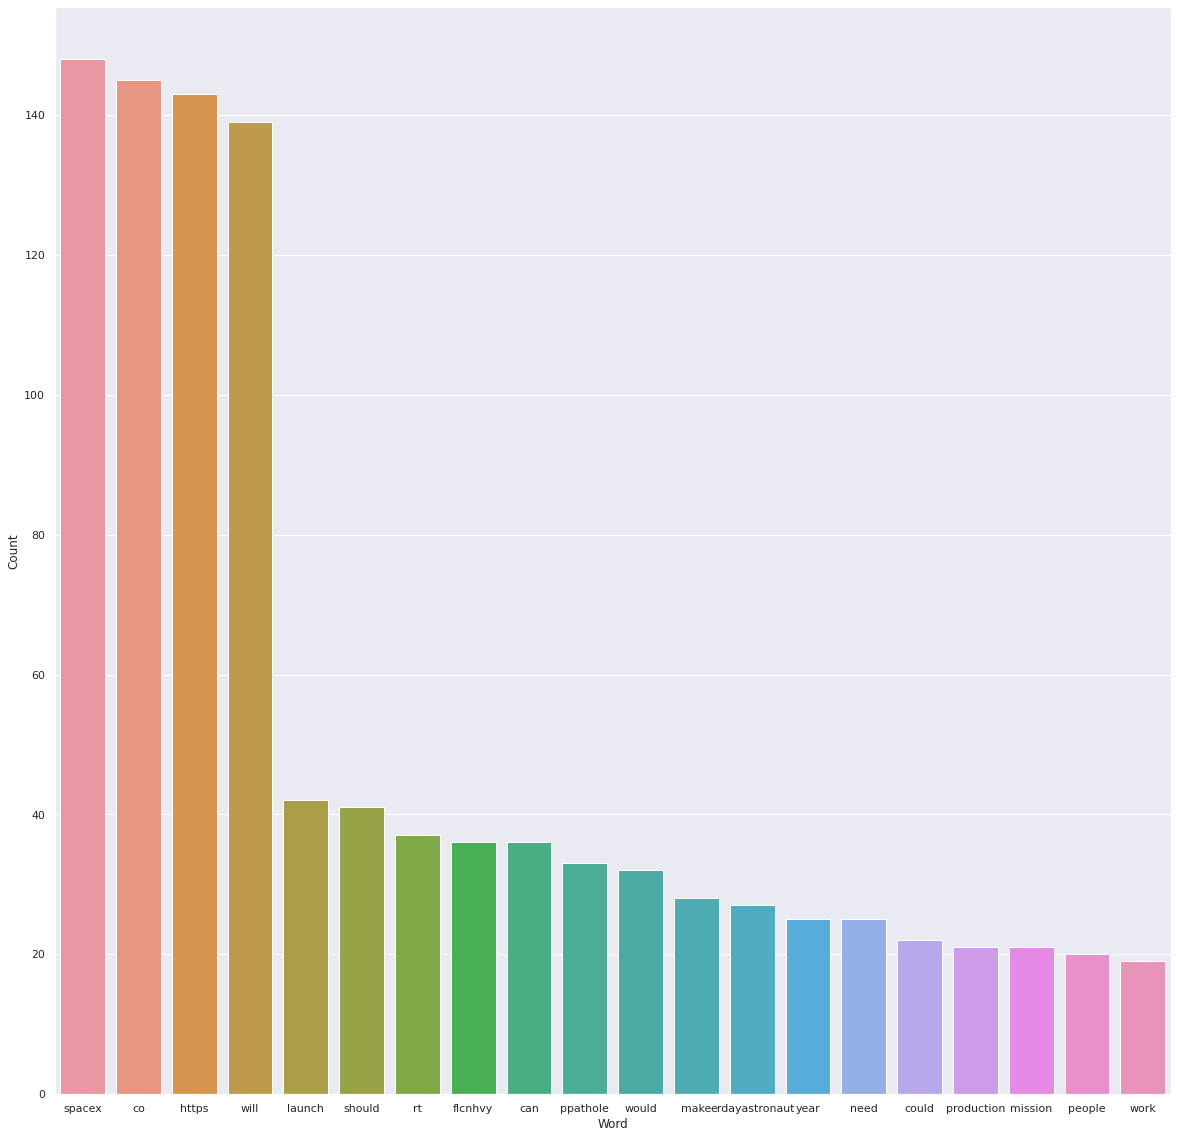

In [20]:
plt.figure(figsize = (20,20))
sns.barplot(x = wf_df['Word'][0:20], y = wf_df['Count'][0:20])

In [21]:
afinn = pd.read_csv('Afinn.csv', sep = ',', encoding = 'latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [23]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
list(itertools.islice(affinity_scores.items(), 20))



[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
sentences = nltk.tokenize.sent_tokenize(' '.join(data))
sentence_df = pd.DataFrame(sentences, columns = ['Sentence'])
sentence_df

,Sentence
0,"1,@kunalb11 Iím an alien 2,@ID_AA_Carmack Ray ..."
1,Have you tried it?
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated 5,@teslacn C..."
4,Now on to the next for even more!!
...,...
777,"1989,@redmercy Yes 1990,""@buzzindelhi Sorry, s..."
778,"1991,""@kenyanwalstreet Not actually a payout, ..."
779,"It may never pay out, as the stock canít bÖ ht..."
780,"Details Aug 28."""


In [27]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text):
    sentiment_score = 0
    if type(text) == str:
        sentence = nlp(text)
        for word in sentence:
            sentiment_score += sentiment_lexicon.get(word.lemma_,0)
    return sentiment_score

In [28]:
sentence_df['Sentiment_value'] = sentence_df['Sentence'].apply(calculate_sentiment)
sentence_df['Sentence_length'] = sentence_df['Sentence'].str.split().apply(len)
sentence_df

,Sentence,Sentiment_value,Sentence_length
0,"1,@kunalb11 Iím an alien 2,@ID_AA_Carmack Ray ...",0,13
1,Have you tried it?,0,4
2,"3,@joerogan @Spotify Great interview!",3,4
3,"4,@gtera27 Doge is underestimated 5,@teslacn C...",3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
777,"1989,@redmercy Yes 1990,""@buzzindelhi Sorry, s...",3,8
778,"1991,""@kenyanwalstreet Not actually a payout, ...",0,11
779,"It may never pay out, as the stock canít bÖ ht...",-4,31
780,"Details Aug 28.""",0,3


In [29]:
sentence_df.describe()

,Sentiment_value,Sentence_length
count,782.000000,782.000000
mean,1.473146,22.597187
std,2.691794,23.031908
min,-7.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,14.000000
75%,3.000000,31.750000
max,16.000000,184.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


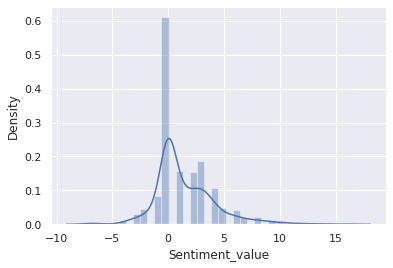

In [30]:
sns.distplot(sentence_df['Sentiment_value'])

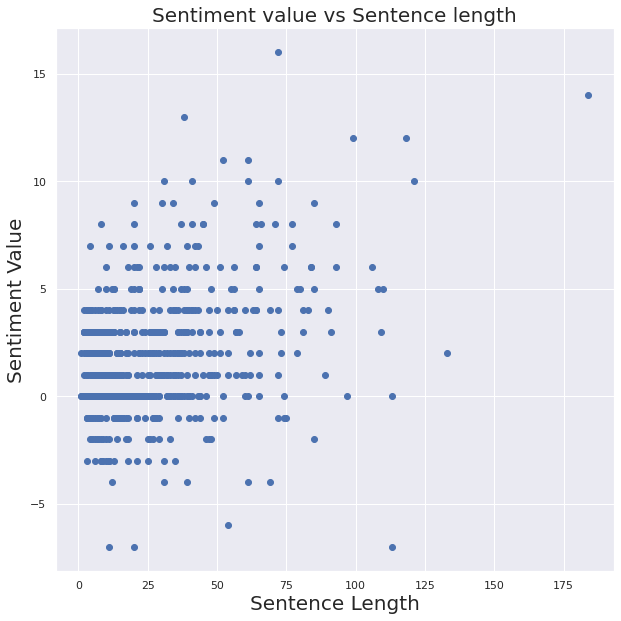

In [31]:
plt.figure(figsize = (10,10))
plt.scatter(sentence_df['Sentence_length'], sentence_df['Sentiment_value'])
plt.title('Sentiment value vs Sentence length', fontsize = 20)
plt.xlabel('Sentence Length', fontsize = 20)
plt.ylabel('Sentiment Value', fontsize = 20)
plt.show()